# Walmart Capstone Project

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline

In [28]:
# Load the dataset
df = pd.read_csv('/content/Walmart DataSet.csv')

# Reading Data and understanding

Overview of Columns : The provided data appears to be a tabular dataset with several columns. Here's an explanation of each column:

 Store: This column represents the identifier for the store where the sales data was recorded. Each row corresponds to a specific store.

 Date: This column represents the date when the sales data was recorded. It seems to be in the format DD-MM-YYYY (day-month-year).

 Weekly_Sales: This column contains the weekly sales figures for a particular store on a specific date. The values are in monetary units (e.g., dollars).

 Holiday_Flag: This column is a binary indicator (0 or 1) that denotes whether the week includes a holiday (1) or not (0). It's likely a flag to mark holiday weeks.

 Temperature: This column represents the temperature on the recorded date. The unit of temperature is not provided, but it could be Celsius or Fahrenheit, depending on the dataset's source.

 Fuel_Price: This column contains the fuel price on the recorded date. The unit of fuel price is not provided, but it is likely a monetary unit (e.g., dollars per gallon).

 CPI (Consumer Price Index): CPI is a measure that examines the weighted average of prices of a basket of consumer goods and services. It's an economic indicator that helps assess changes in the general level of prices.

 Unemployment: This column represents the unemployment rate on the recorded date. It indicates the percentage of the labor force that is unemployed but actively seeking employment.

In [29]:
# check top 5 rows of dataset
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


Each row in the dataset represents a specific week's sales data for a particular store, including information such as date, sales figures, holiday status, temperature, fuel price, CPI, and unemployment rate. This kind of dataset is common in retail analytics, where the goal might be to analyze the factors influencing weekly sales and make predictions or recommendations based on the patterns observed in the data.



# **Exploratory Data Analysis(EDA)**

In [30]:
# check for data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In summary, the DataFrame contains 6435 entries (rows) and 8 columns. Each column has 6435 non-null entries, and the memory usage is around 402.3 KB. The columns include information such as store number, date, weekly sales, holiday flag, temperature, fuel price, CPI (Consumer Price Index), and unemployment rate.



It is found that Date column is in object type. Lets convert into datetime type

In [31]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          2565 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [33]:
# check for null/missing values
df.isnull().sum()

Store              0
Date            3870
Weekly_Sales       0
Holiday_Flag       0
Temperature        0
Fuel_Price         0
CPI                0
Unemployment       0
dtype: int64

In [34]:
# check the shape of dataframe
df.shape

(6435, 8)

In [35]:
#Data rows are unique
df.duplicated().sum()

0

In [36]:
# check for outliers
z_scores = df.apply(lambda x: np.abs((x-x.mean()) / x.std()))
threshold = 3
outliers = df[z_scores > threshold]

print('Outliers: ')
print(outliers)

Outliers: 
      Store Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  CPI  \
0       NaN  NaT           NaN           NaN          NaN         NaN  NaN   
1       NaN  NaT           NaN           1.0          NaN         NaN  NaN   
2       NaN  NaT           NaN           NaN          NaN         NaN  NaN   
3       NaN  NaT           NaN           NaN          NaN         NaN  NaN   
4       NaN  NaT           NaN           NaN          NaN         NaN  NaN   
...     ...  ...           ...           ...          ...         ...  ...   
6430    NaN  NaT           NaN           NaN          NaN         NaN  NaN   
6431    NaN  NaT           NaN           NaN          NaN         NaN  NaN   
6432    NaN  NaT           NaN           NaN          NaN         NaN  NaN   
6433    NaN  NaT           NaN           NaN          NaN         NaN  NaN   
6434    NaN  NaT           NaN           NaN          NaN         NaN  NaN   

      Unemployment  
0              NaN  
1         

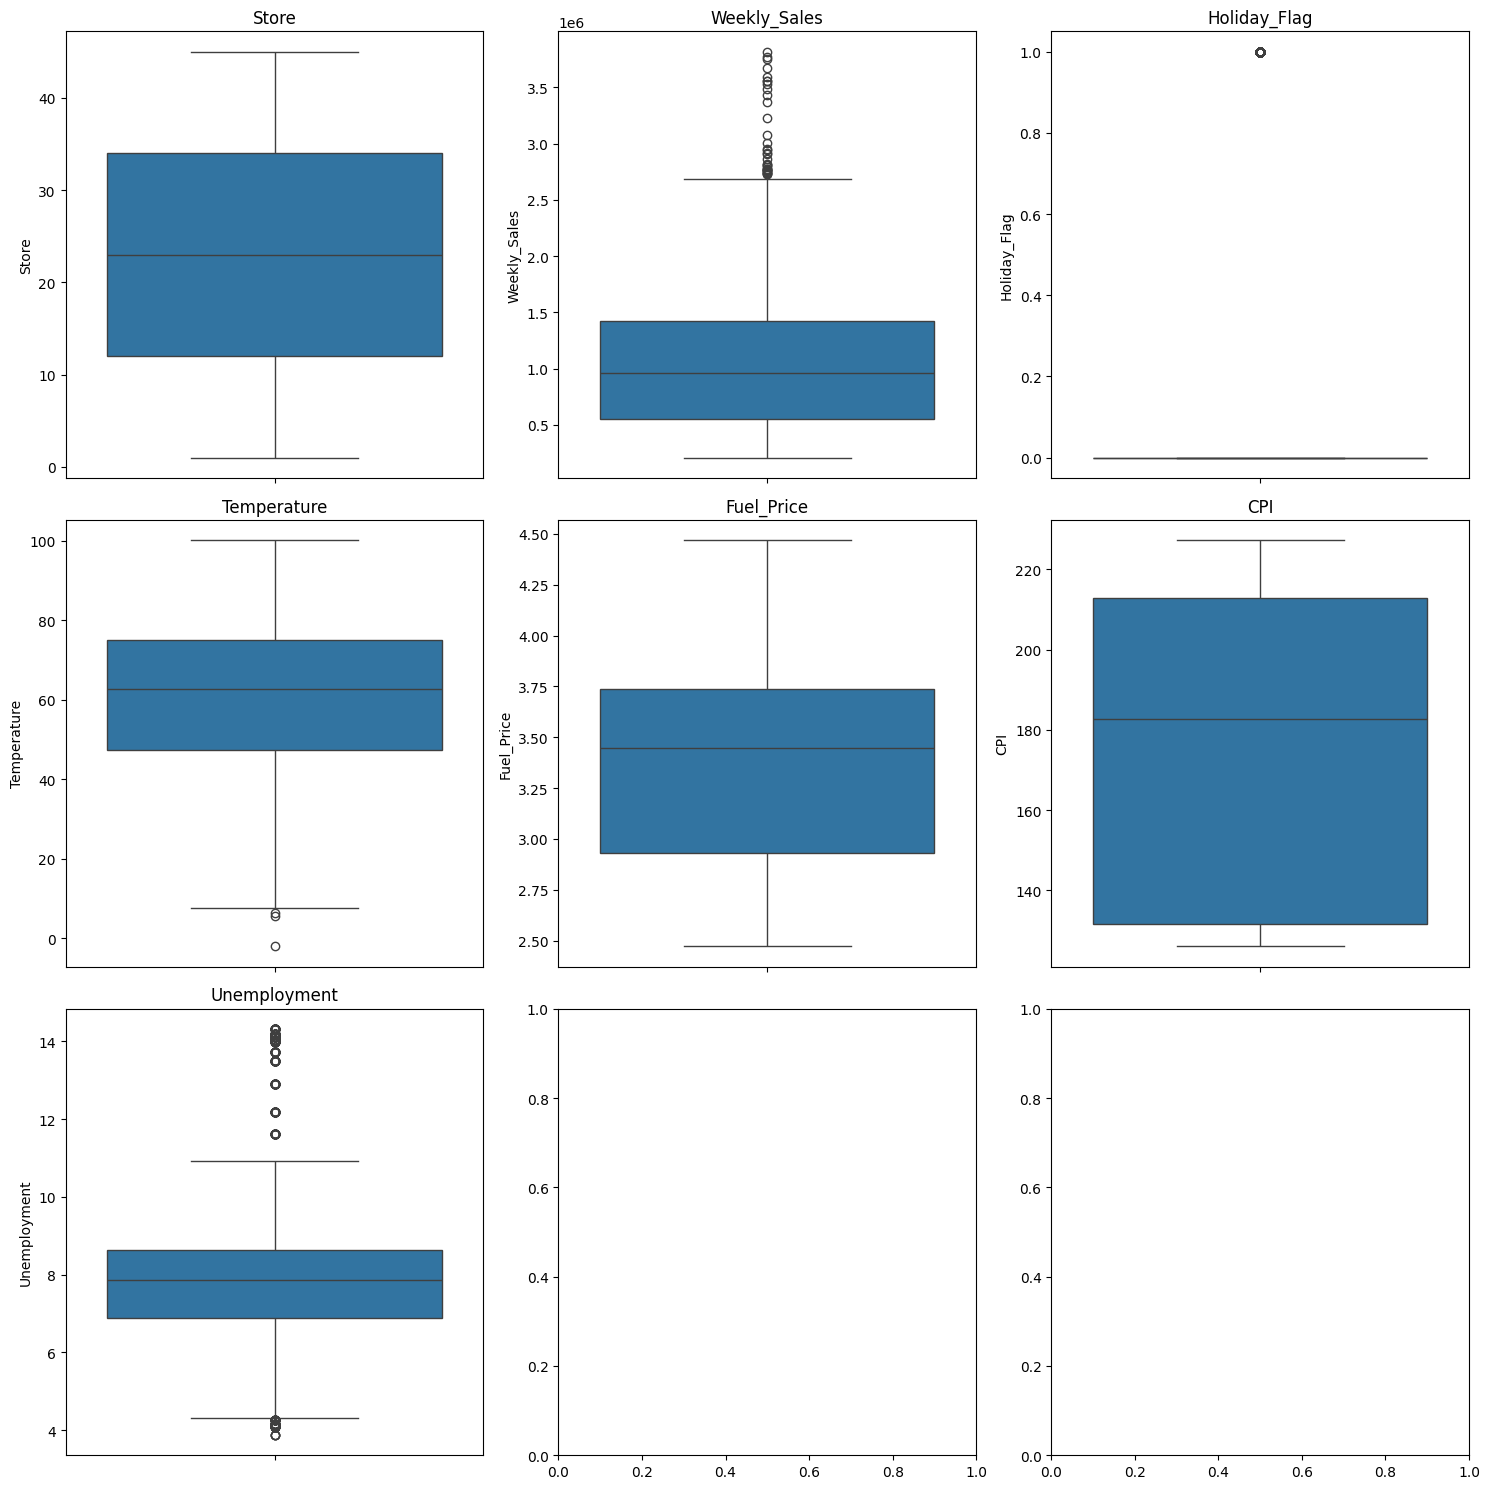

In [38]:
# Visualize the ouliers
num_cols = 3  # You can change this number according to your preference
num_rows = (len(df.select_dtypes(include=[np.number]).columns) - 1) // num_cols + 1

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Flatten the axes if there's only one row
if num_rows == 1:
    axes = [axes]

# Iterate over each numeric column in the DataFrame
for i, col in enumerate(df.select_dtypes(include=[np.number]).columns):
    # Calculate the position of the subplot
    row_idx = i // num_cols
    col_idx = i % num_cols


       # Create a boxplot for the current column
    sns.boxplot(data=df[col], ax=axes[row_idx, col_idx])

    # Set title for the subplot
    axes[row_idx][col_idx].set_title(col)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

## **From the above boxplot WEEKLY SALES and UNEMPLOYMENT having outliers**

# **Handling Ouliers**

In [39]:
# Handling outliers
def handle_outliers(df, col, threshold=3):
    """
    Handle outliers in a DataFrame column by replacing them with the median value.

    Parameters:
        df (DataFrame): Input DataFrame.
        col (str): Name of the column containing outliers.
        threshold (float): Z-score threshold to identify outliers. Default is 3.

    Returns:
        DataFrame: DataFrame with outliers replaced by the median value.
    """
    # Calculate Z-scores for the specified column
    z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())

    # Identify outliers using the threshold
    outliers_mask = z_scores > threshold

    # Replace outliers with the median value
    df_cleaned = df.copy()  # Create a copy to avoid modifying the original DataFrame
    df_cleaned.loc[outliers_mask, col] = df[col].median()

    return df_cleaned

# Example usage:
df_cleaned = handle_outliers(df, 'Weekly_Sales')
df_cleaned = handle_outliers(df_cleaned, 'Unemployment')


# **Correlation Analysis**

In [40]:
df_corr = df_cleaned.corr(numeric_only=True)
print(df_corr)

                     Store  Weekly_Sales  Holiday_Flag  Temperature  \
Store         1.000000e+00     -0.331732 -4.386841e-16    -0.022659   
Weekly_Sales -3.317322e-01      1.000000  2.392758e-02    -0.045311   
Holiday_Flag -4.386841e-16      0.023928  1.000000e+00    -0.155091   
Temperature  -2.265908e-02     -0.045311 -1.550913e-01     1.000000   
Fuel_Price    6.002295e-02      0.017400 -7.834652e-02     0.144982   
CPI          -2.094919e-01     -0.069948 -2.162091e-03     0.176888   
Unemployment  2.486480e-01     -0.095845  1.399390e-02     0.075733   

              Fuel_Price       CPI  Unemployment  
Store           0.060023 -0.209492      0.248648  
Weekly_Sales    0.017400 -0.069948     -0.095845  
Holiday_Flag   -0.078347 -0.002162      0.013994  
Temperature     0.144982  0.176888      0.075733  
Fuel_Price      1.000000 -0.170642     -0.024987  
CPI            -0.170642  1.000000     -0.220248  
Unemployment   -0.024987 -0.220248      1.000000  


<Axes: >

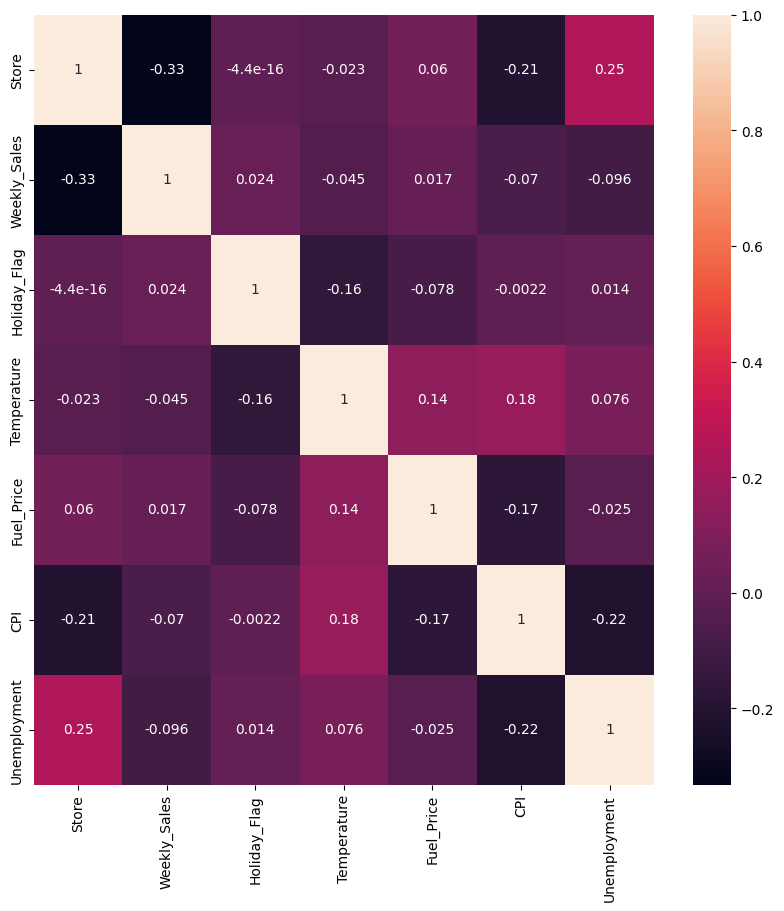

In [41]:
#Plotting heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df_corr,annot=True)

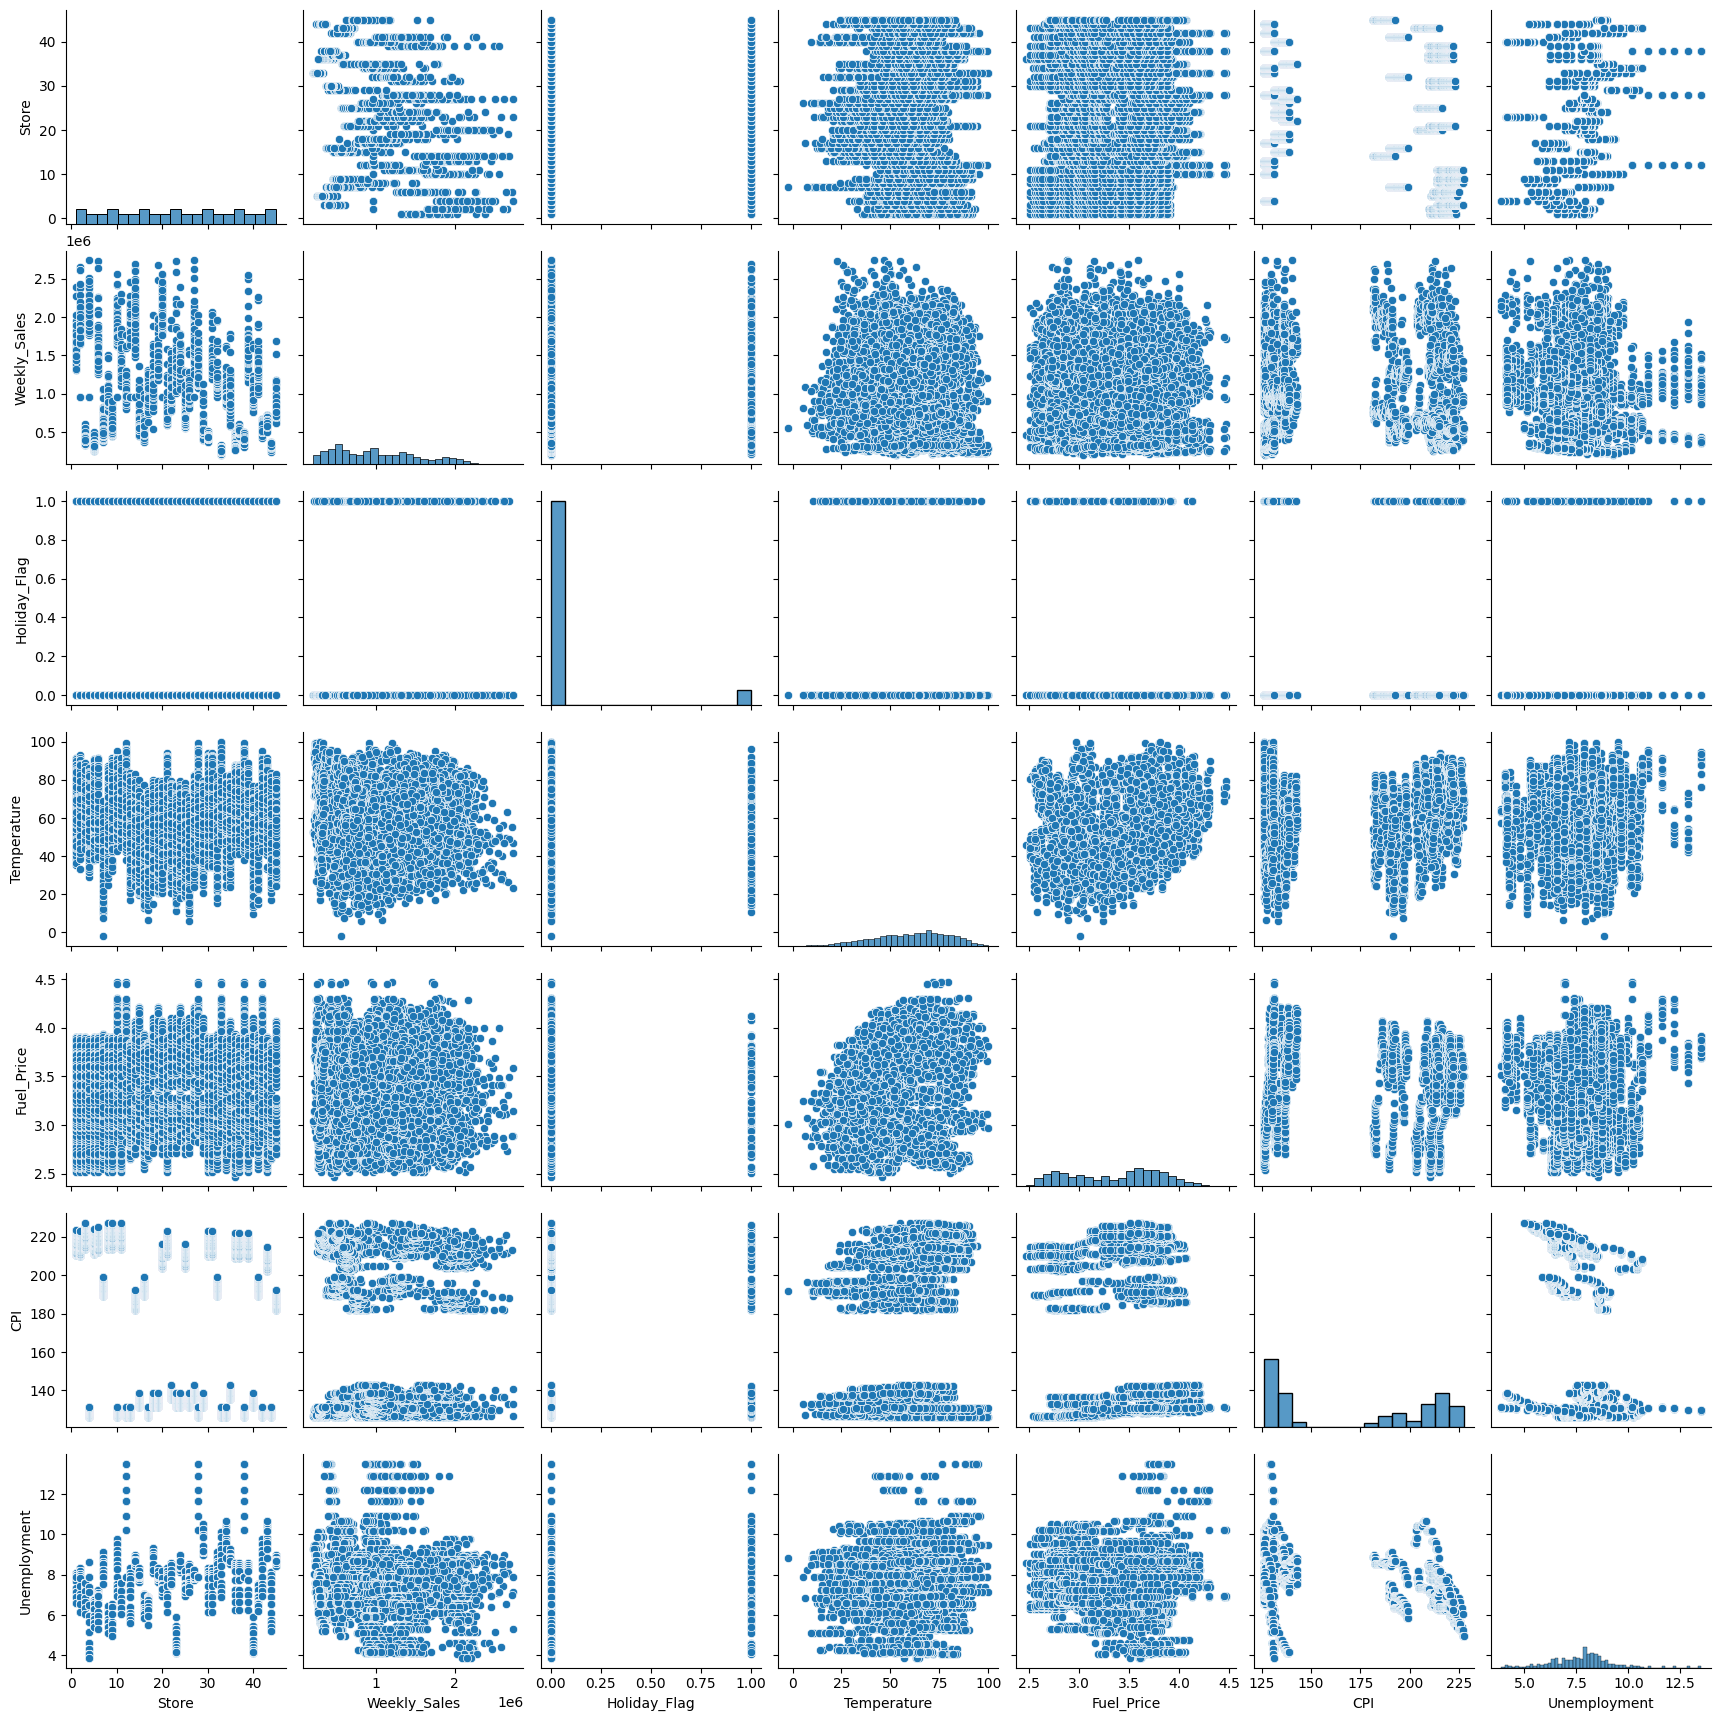

In [42]:
sns.pairplot(df_cleaned)

## **a. If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?**

    Store       level_1  Unemployment
0       1  Weekly_Sales     -0.097955
1       2  Weekly_Sales      0.025963
2       3  Weekly_Sales     -0.230413
3       4  Weekly_Sales     -0.344372
4       5  Weekly_Sales     -0.207043
5       6  Weekly_Sales      0.044251
6       7  Weekly_Sales     -0.165382
7       8  Weekly_Sales     -0.052580
8       9  Weekly_Sales     -0.191534
9      10  Weekly_Sales      0.099528
10     11  Weekly_Sales     -0.020339
11     12  Weekly_Sales      0.087686
12     13  Weekly_Sales     -0.229574
13     14  Weekly_Sales      0.200388
14     15  Weekly_Sales      0.078905
15     16  Weekly_Sales     -0.070864
16     17  Weekly_Sales     -0.263600
17     18  Weekly_Sales      0.139179
18     19  Weekly_Sales      0.101464
19     20  Weekly_Sales     -0.019677
20     21  Weekly_Sales      0.218367
21     22  Weekly_Sales      0.039043
22     23  Weekly_Sales     -0.077169
23     24  Weekly_Sales     -0.012261
24     25  Weekly_Sales     -0.004958
25     26  W

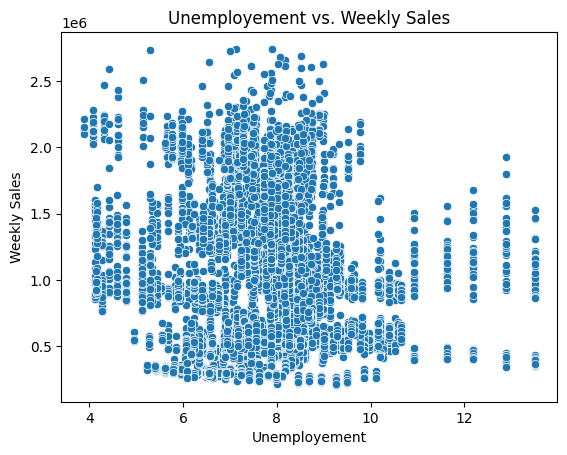

Store IDs affected:
 36
38
44


In [43]:
# a. If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?
# Calculate correlation between Weekly_Sales and Unemployment for each store
corr_unemp = df_cleaned.groupby('Store')[['Weekly_Sales', 'Unemployment']].corr().iloc[0::2,-1].reset_index()
print(corr_unemp)
sns.scatterplot(data=df_cleaned, x='Unemployment', y='Weekly_Sales')
plt.title('Unemployement vs. Weekly Sales')
plt.xlabel('Unemployement')
plt.ylabel('Weekly Sales')
plt.show()
#Printing store IDs affected by Unemployment
cr=corr_unemp[corr_unemp['Unemployment'].abs() > 0.5]
print("Store IDs affected:\n",cr['Store'].to_string(index=False))

# **b. If the weekly sales show a seasonal trend, when and what could be the reason?**

<ipython-input-45-7246b4fac0ad>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_cleaned, x='Month', y='Weekly_Sales', hue='Year', ci=None)


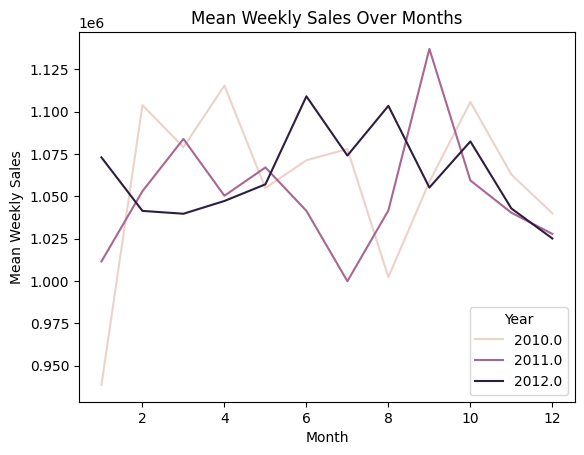

In [45]:
df_cleaned['Date']=pd.to_datetime(df['Date'])
df_cleaned['Month']=df_cleaned['Date'].dt.month
df_cleaned['Year']=df_cleaned['Date'].dt.year
sns.lineplot(data=df_cleaned, x='Month', y='Weekly_Sales', hue='Year', ci=None)
plt.title('Mean Weekly Sales Over Months')
plt.xlabel('Month')
plt.ylabel('Mean Weekly Sales')
plt.show()

# From the above graph it is observed that weekly sales took spike in december 2010 and 2011, where as in 2012 weekly sales remained in normal range

# **c. Does temperature affect the weekly sales in any manner?**

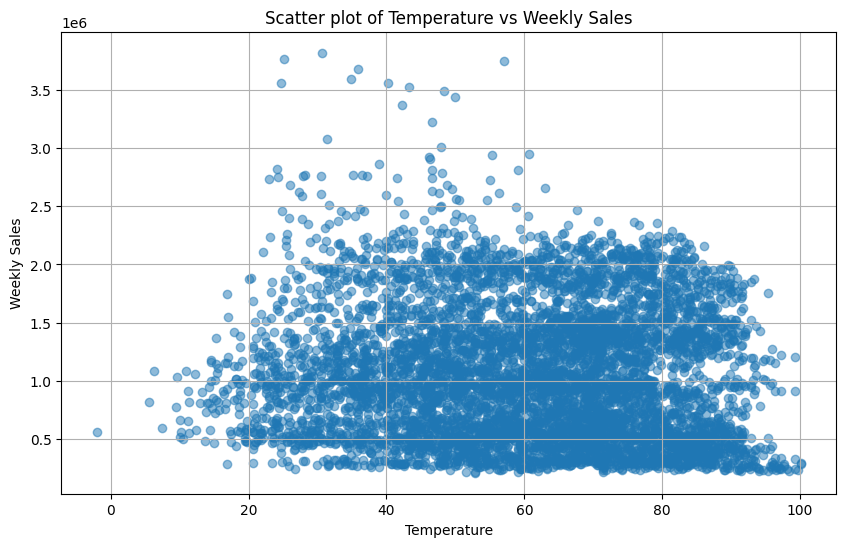

In [46]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Temperature'], df['Weekly_Sales'], alpha=0.5)
plt.title('Scatter plot of Temperature vs Weekly Sales')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.grid(True)
plt.show()

# From the above graph, the highest sales occur for most store types between the range of 40 to 80 degrees Fahrenheit, thus proving the idea that pleasant weather encourages higher sales. Sales are relatively lower for very low and very high temperatures but seem to be adequately high for favorable climate conditions

# **d. How is the Consumer Price index affecting the weekly sales of various stores?**

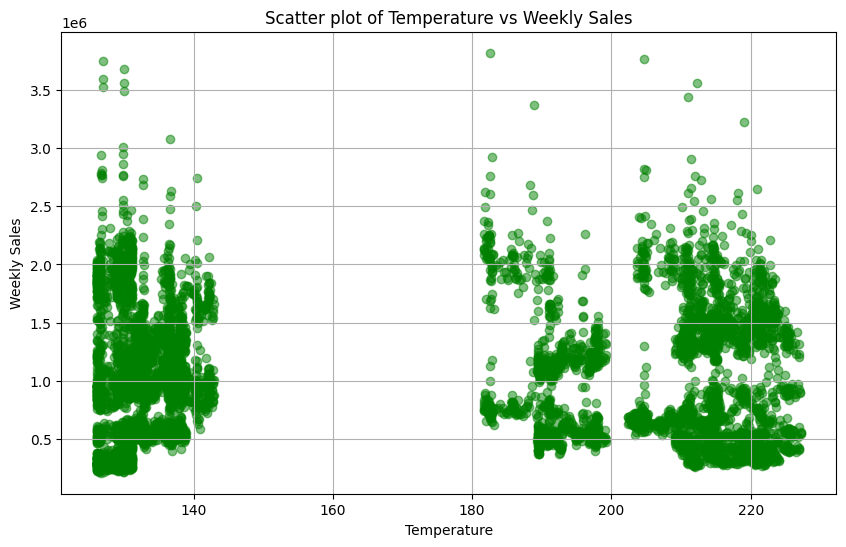

In [47]:
plt.figure(figsize=(10, 6))
plt.scatter(df['CPI'], df['Weekly_Sales'], alpha=0.5, c='g')
plt.title('Scatter plot of Temperature vs Weekly Sales')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.grid(True)
plt.show()

# From the above graph, we can identify three different clusters around different ranges of CPI, while there seems to be no visible relationship between the change in CPI and weekly sales for stores.

# **e. Top performing stores according to the historical data.**
# f. The worst performing store, and how significant is the difference between **the**
# highest and lowest performing stores.

In [48]:
#Top performing stores
top_stores = df_cleaned.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False).head()

#Worst performing store and performance difference
worst_store = df_cleaned.groupby('Store')['Weekly_Sales'].sum().idxmin()
performance_difference = df_cleaned.groupby('Store')['Weekly_Sales'].sum().max() - df_cleaned.groupby('Store')['Weekly_Sales'].sum().min()

print("Top performing stores:", top_stores)
print("Worst performing store:", worst_store)
print("Difference between highest and lowest performing stores:", performance_difference)

Top performing stores: Store
4     2.885790e+08
20    2.867490e+08
14    2.799706e+08
13    2.739669e+08
2     2.706436e+08
Name: Weekly_Sales, dtype: float64
Worst performing store: 33
Difference between highest and lowest performing stores: 251418790.29999998


# **Time Series Analysis**
Check for stationarity

# 2. Use predictive modeling techniques to forecast the sales for each store for the next 12 weeks.

In [49]:
from statsmodels.tsa.stattools import adfuller

# check for stationarity
def adf_test(series, title=''):

    print('Augmented Dickey-Fuller Test: {}'.format(title))
    # .dropna() handles differenced data
    result = adfuller(series,autolag='AIC')

    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out['critical value ({})'.format(key)]=val

    # .to_string() removes the line "dtype: float64"
    print(out.to_string())

    if result[1] <= 0.05:

        print("Rejects the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary.")

In [ ]:
adf_test(df_cleaned['Weekly_Sales'], title ='ADF TEST')

Augmented Dickey-Fuller Test: ADF TEST
ADF test statistic        -4.786972
p-value                    0.000058
# lags used               34.000000
# observations          6400.000000
critical value (1%)       -3.431372
critical value (5%)       -2.861992
critical value (10%)      -2.567010
Rejects the null hypothesis
Data has no unit root and is stationary


# **Visualize the stationary data with Rolling mean & standard deviation**

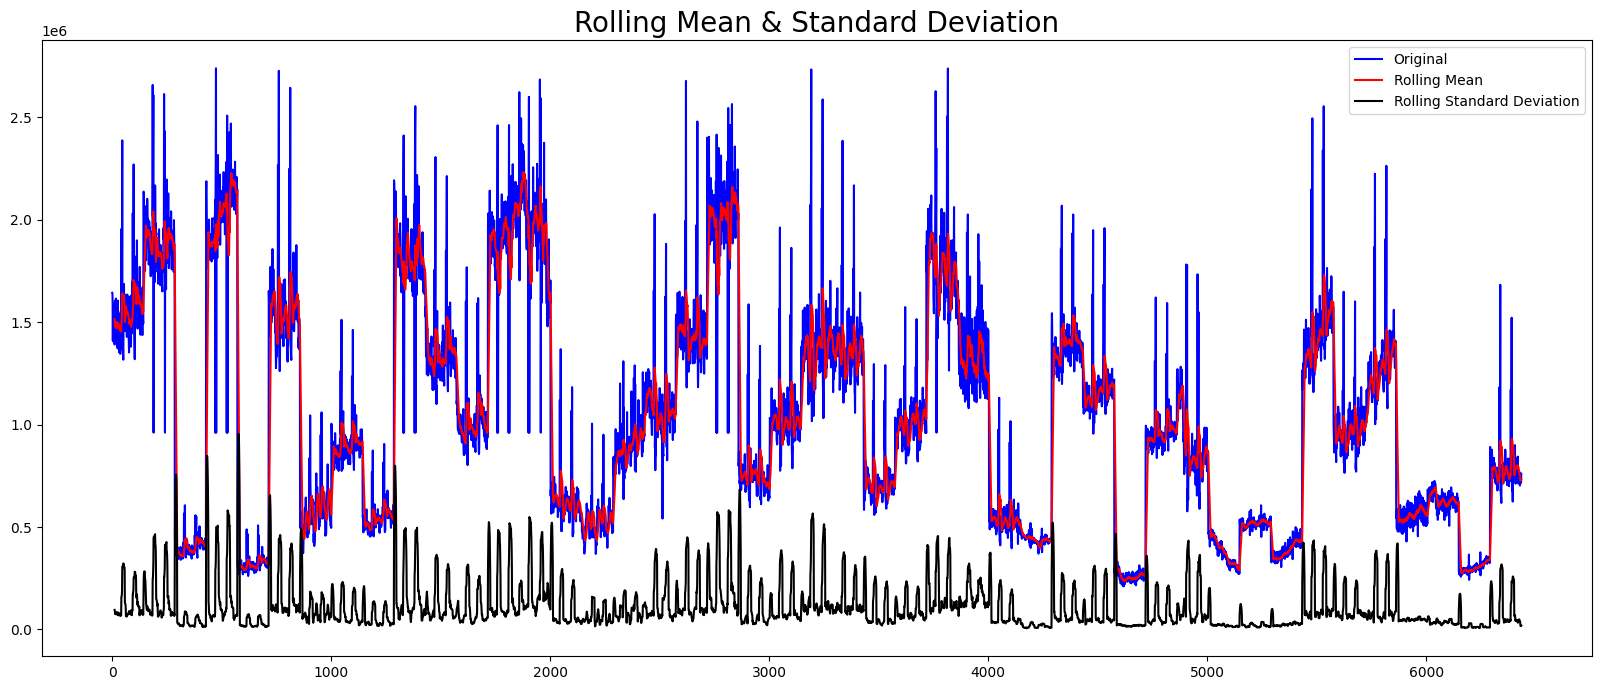

In [50]:
rolmean = df_cleaned['Weekly_Sales'].rolling(12).mean()
rolstd = df_cleaned['Weekly_Sales'].rolling(12).std()

#plot rolling statistics
plt.figure(figsize=(20,8))
orig = plt.plot(df_cleaned['Weekly_Sales'],color='Blue',label='Original')
mean = plt.plot(rolmean,color='Red',label='Rolling Mean')
std = plt.plot(rolstd,color='Black',label='Rolling Standard Deviation')

plt.legend()
plt.title('Rolling Mean & Standard Deviation',fontsize=20)
plt.show()

[1.         0.93981235 0.92052522 0.91310084 0.9130106  0.88602382
 0.87755202 0.87220841 0.87025651 0.86457187 0.85403799 0.84848413
 0.84178241 0.84019104 0.83050656 0.82538492 0.82006845 0.8167255
 0.80643663 0.79669907 0.78945389 0.78377577 0.77888801 0.77106595
 0.76646986 0.76215599 0.75932342 0.74988647 0.74145303 0.73302687
 0.72554757 0.71641675 0.70896937 0.70307594 0.69847989 0.69695275
 0.68745282 0.68011837 0.67235879 0.66723776 0.65869432 0.65239492
 0.64508576 0.64377975 0.63713958 0.63009203 0.62465762 0.61895248
 0.62268212 0.61248139 0.60909966 0.6056858  0.62211173 0.59928679
 0.58388799 0.57541126 0.57195683 0.55558123 0.54643742 0.54090239
 0.53591342]


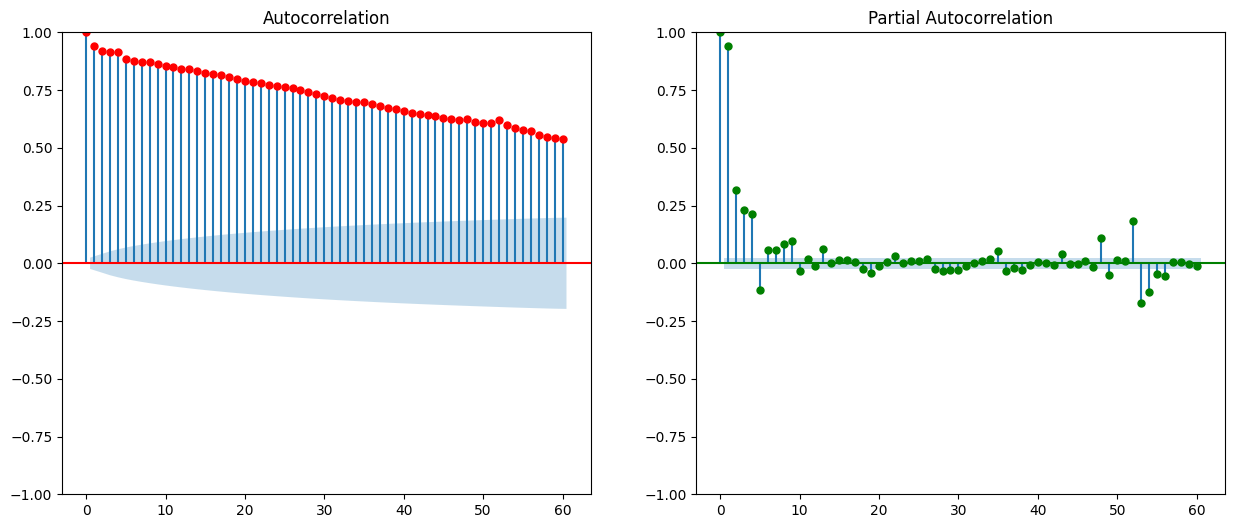

In [51]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(15, 6))
autocorr = acf(df_cleaned['Weekly_Sales'], nlags=60, fft=False)
print(autocorr)

plot_acf(df_cleaned['Weekly_Sales'].tolist(), lags=60, ax=ax[0], fft=False, color='Red');
plot_pacf(df_cleaned['Weekly_Sales'].tolist(), lags=60, ax=ax[1], color='Green');

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

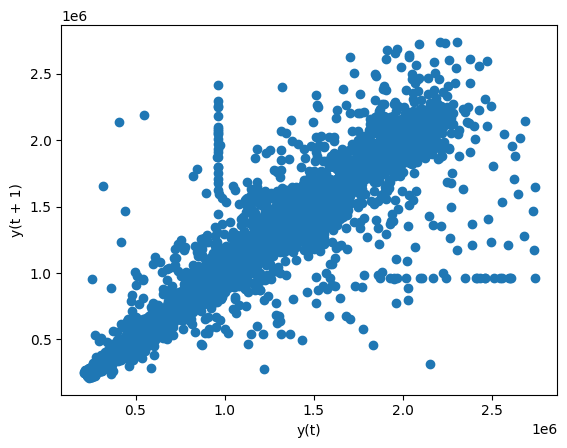

In [53]:
from pandas.plotting import lag_plot
lag_plot(df_cleaned['Weekly_Sales'])

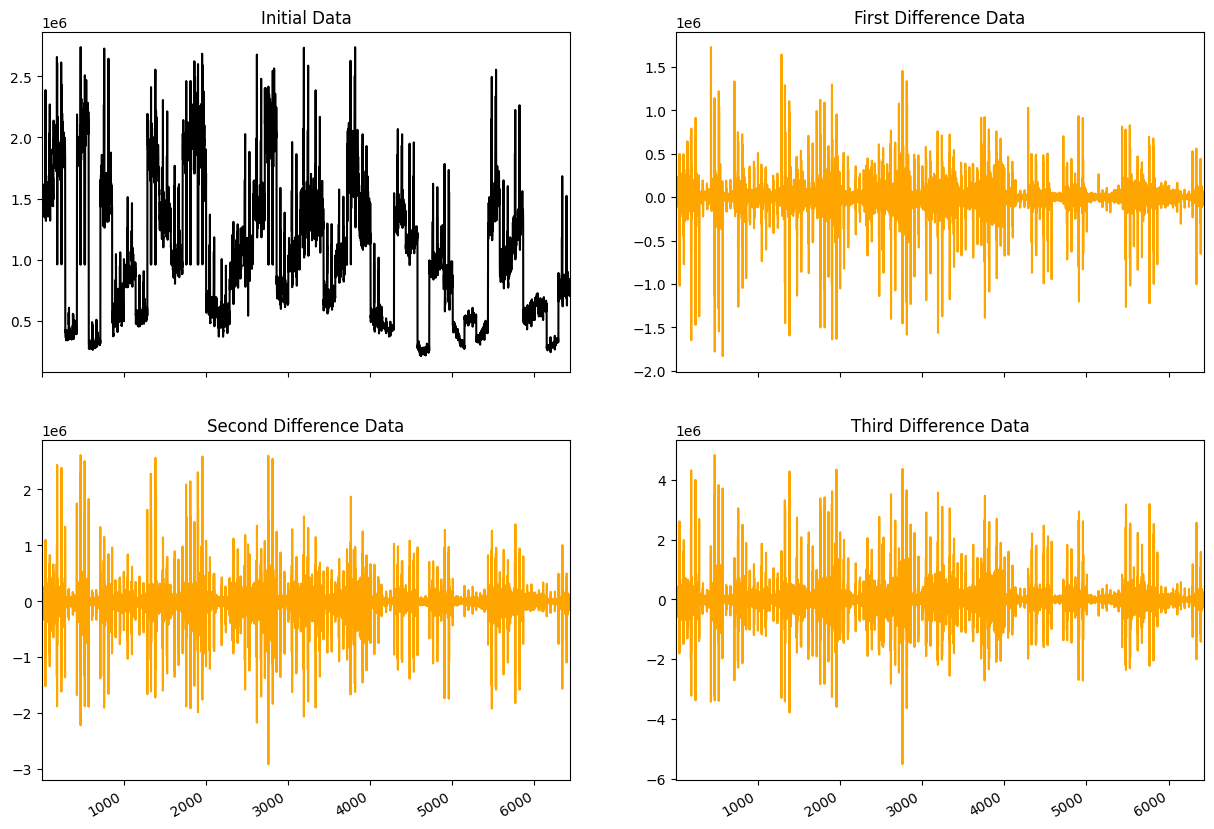

In [54]:
from statsmodels.tsa.statespace.tools import diff

fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(15, 11))
# Set the differences from the initial data
df_cleaned['OpenDiff1'] = diff(df_cleaned['Weekly_Sales'],k_diff=1)
df_cleaned['OpenDiff2'] = diff(df_cleaned['Weekly_Sales'],k_diff=2)
df_cleaned['OpenDiff3'] = diff(df_cleaned['Weekly_Sales'],k_diff=3)

# Plot the initial data and as well as Differences in initial data
df_cleaned['Weekly_Sales'].plot(title="Initial Data",ax=ax[0][0], color='Black').autoscale(axis='x',tight=True);
df_cleaned['OpenDiff1'].plot(title="First Difference Data",ax=ax[0][1],color='Orange').autoscale(axis='x',tight=True);
df_cleaned['OpenDiff2'].plot(title="Second Difference Data",ax=ax[1][0],color='Orange').autoscale(axis='x',tight=True);
df_cleaned['OpenDiff3'].plot(title="Third Difference Data",ax=ax[1][1],color='Orange').autoscale(axis='x',tight=True);

fig.autofmt_xdate()

Text(0.5, 0.98, 'Open decomposition')

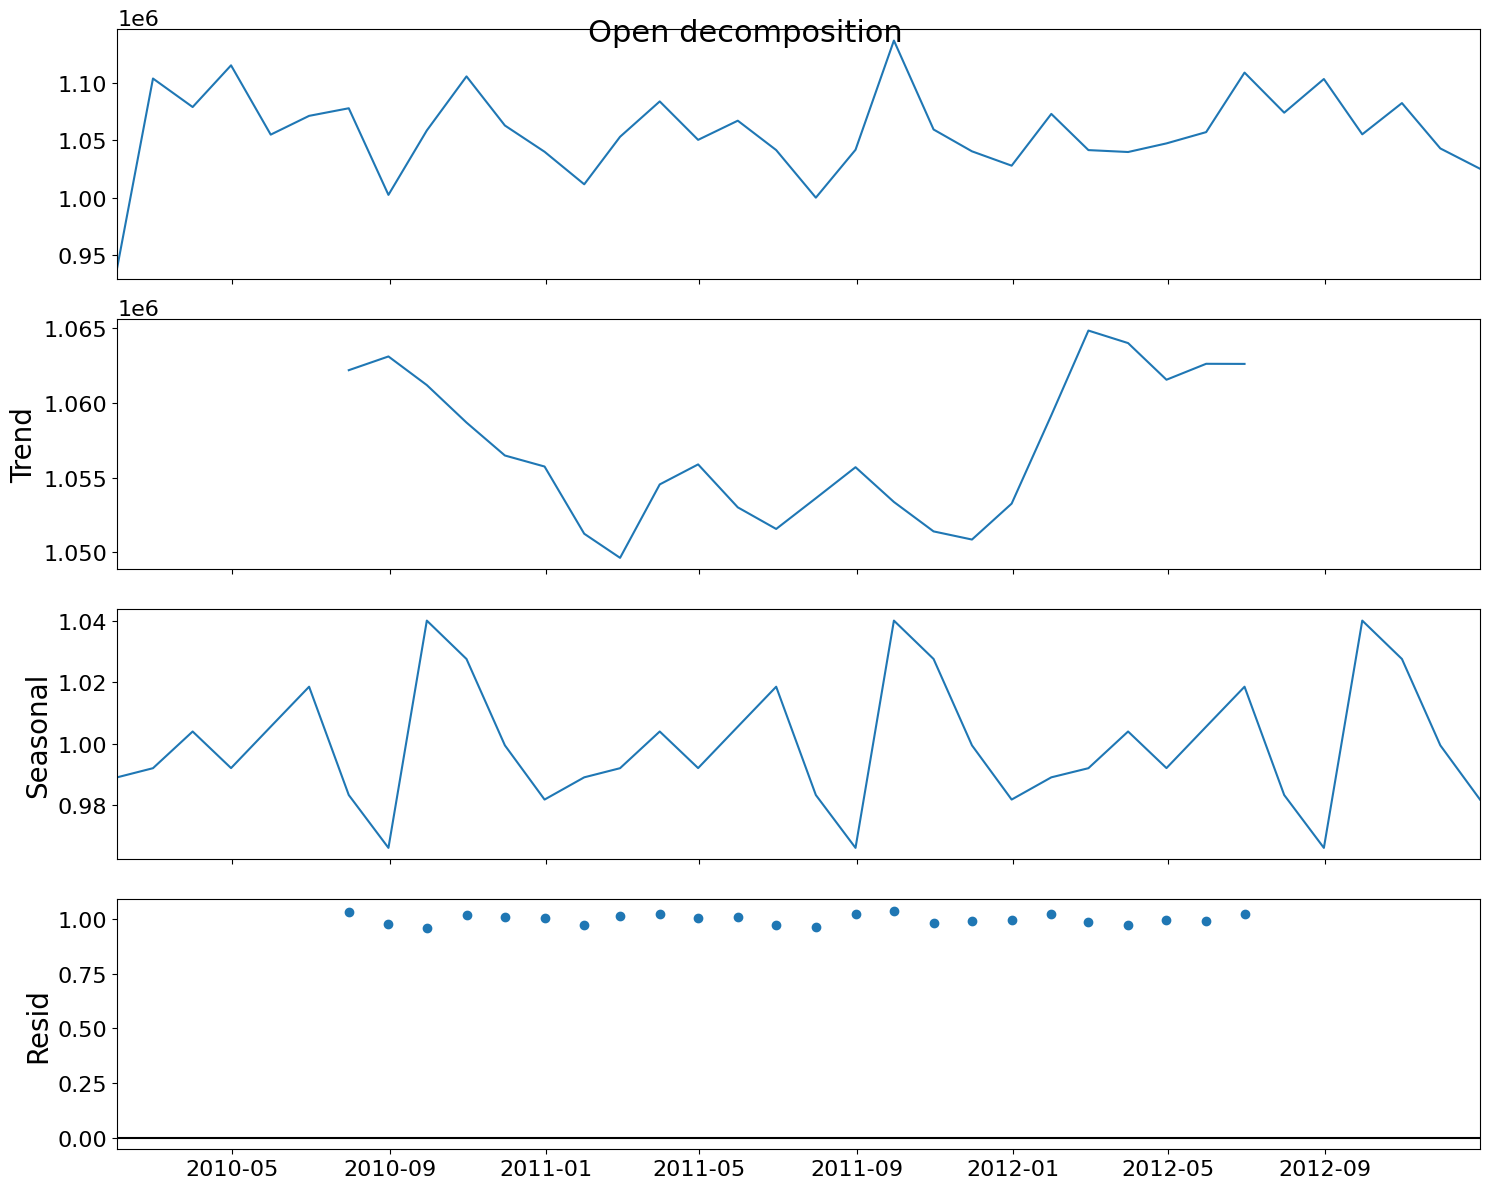

In [55]:
from pylab import rcParams
import pandas as pd
import statsmodels.api as sm

# Aggregating the Time Series to a monthly scaled index
y = df_cleaned[['Date','Weekly_Sales']].copy()
y.set_index('Date', inplace=True)
y.index = pd.to_datetime(y.index)
y = y.resample('1M').mean()

# Setting rcparams
rcParams['figure.figsize'] = 15, 12
rcParams['axes.labelsize'] = 20
rcParams['ytick.labelsize'] = 16
rcParams['xtick.labelsize'] = 16

# DECOMPOSING TIME SERIES
decomposition = sm.tsa.seasonal_decompose(y, model='multiplicative', period=12)
decomp = decomposition.plot()
decomp.suptitle('Open decomposition', fontsize=22)


# **Moving Average(MA)**

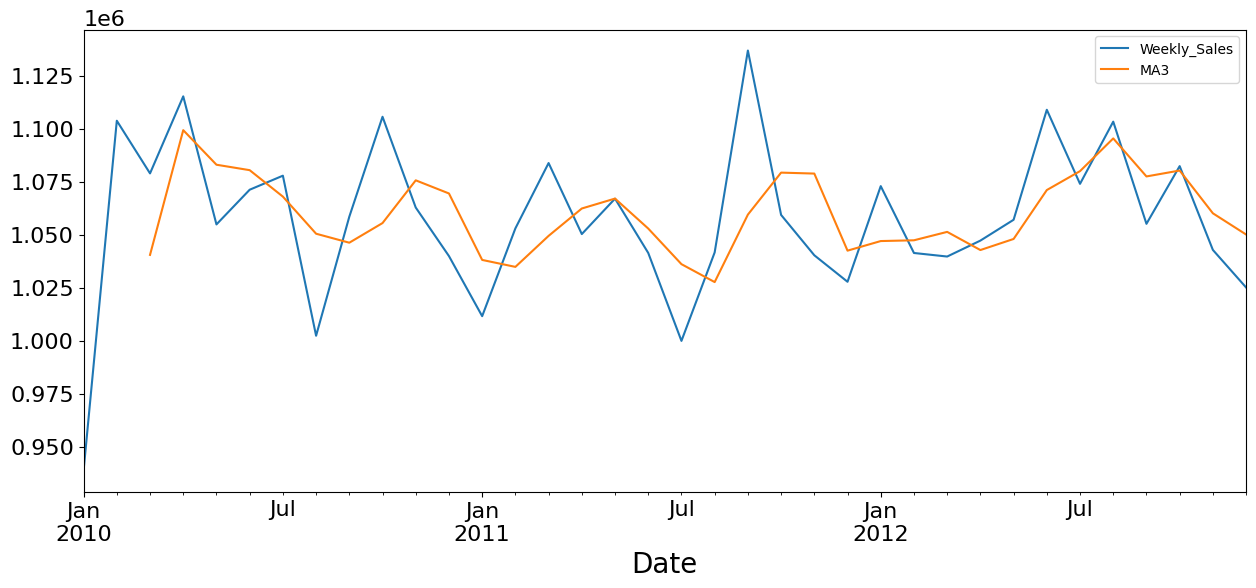

In [56]:
# Aggregating the Time Series to a monthly scaled index
y = df_cleaned[['Date','Weekly_Sales']].copy()
y.set_index('Date', inplace=True)
y.index = pd.to_datetime(y.index)
y = y.resample('1M').mean()

y['MA3'] = y.rolling(window=3).mean()
y.plot(figsize=(15,6));

- Moving average is the estimation of the trend-cycle at time , and is obtained by averaging the values of the time series within number of periods of time.
- The Observations that are nearby in time are also likely to be close in value.

# **Exponential Smoothing**

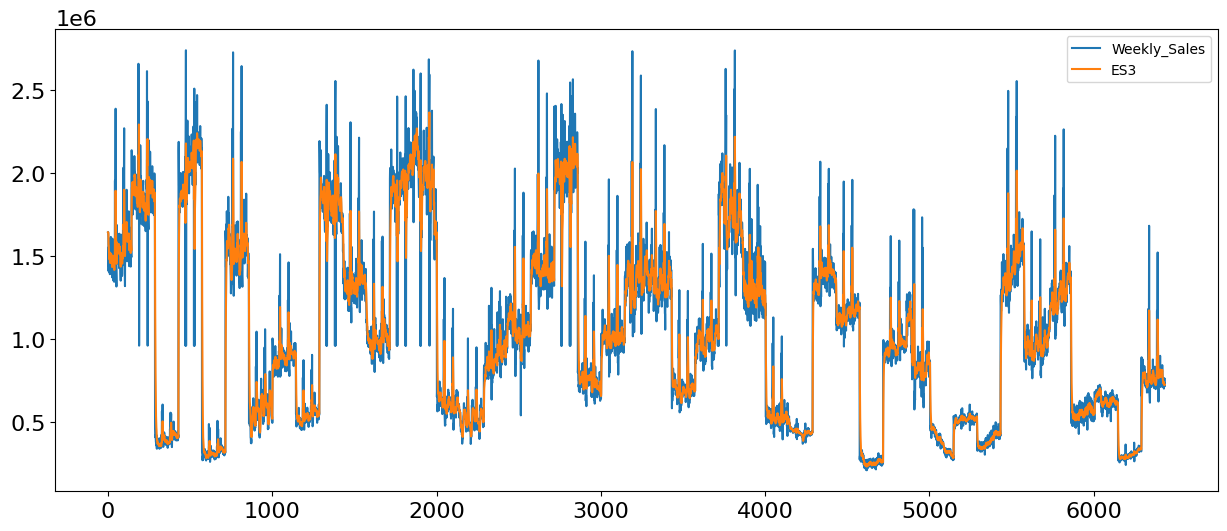

In [57]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
# Setting the span value
span = 6
# Weights of observations
alpha = 2/(span+1)

# Plot Simple exponential smoothing
df_cleaned['ES3'] = SimpleExpSmoothing(df_cleaned['Weekly_Sales']).fit(smoothing_level = alpha, optimized = False).fittedvalues.shift(-1)
df_cleaned[['Weekly_Sales','ES3']].plot(figsize=(15,6));

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


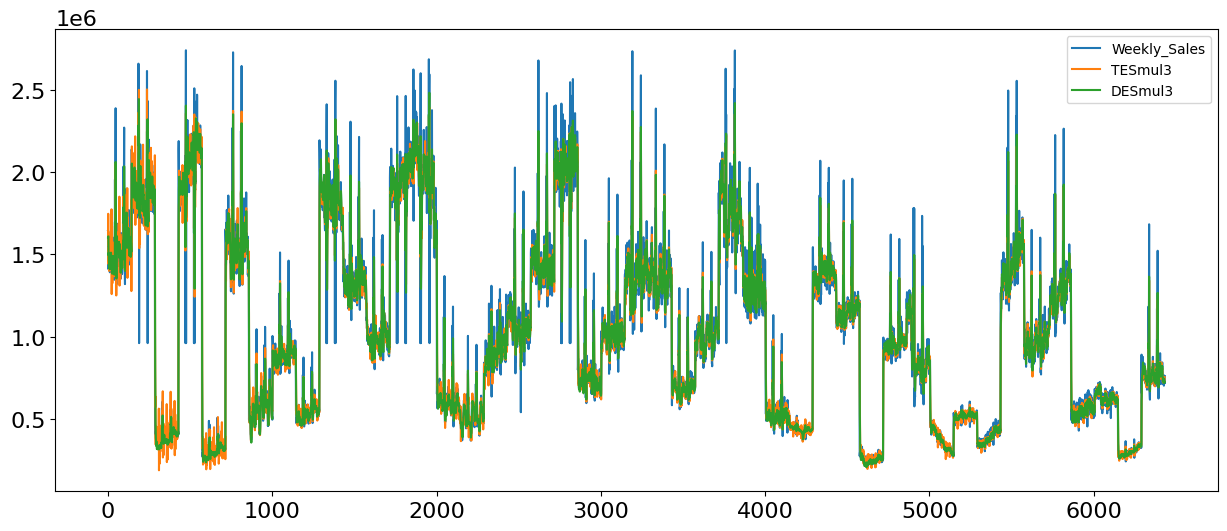

In [58]:
# Plot Double and Triple exponential smoothing
df_cleaned['DESmul3'] = ExponentialSmoothing(df_cleaned['Weekly_Sales'], trend = 'add').fit().fittedvalues.shift(-1)
df_cleaned['TESmul3'] = ExponentialSmoothing(df_cleaned['Weekly_Sales'], trend = 'add', seasonal = 'add', seasonal_periods = 24).fit().fittedvalues.shift(-1)
df_cleaned[['Weekly_Sales', 'TESmul3', 'DESmul3']].plot(figsize = (15,6));

In [59]:
df_cleaned = df_cleaned.sort_values(by='Date')

In [60]:
df_cleaned.shape

(6435, 16)

In [61]:
# Reset index column to put Date column back into Dataframe
df_cleaned.reset_index(level=0, inplace=True)

In [62]:
#Creating train and test set
train = df_cleaned[0:4505]
test= df_cleaned[4505:]

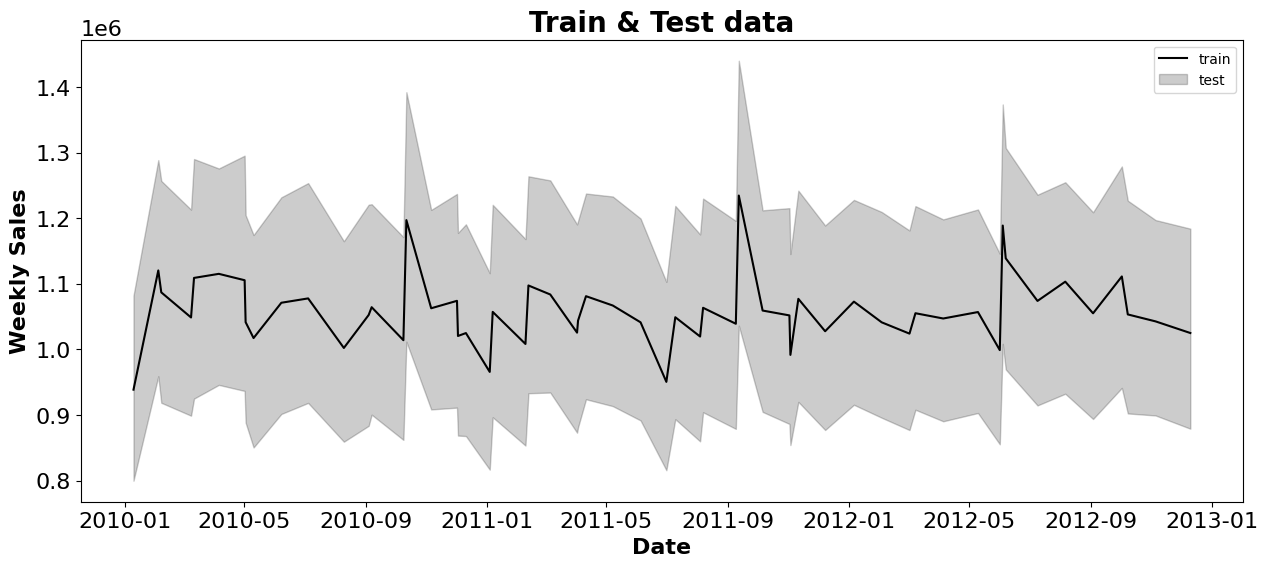

In [63]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(x='Date', y='Weekly_Sales', data=train, color='black', ax=ax)
sns.lineplot(x='Date', y='Weekly_Sales', data=test, color='blue', ax=ax)

# Formatting
ax.set_title('Train & Test data', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Date', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Weekly Sales', fontsize = 16, fontdict=dict(weight='bold'))
plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=16)
plt.legend(loc='upper right' ,labels = ('train', 'test'))

# **i) Naive's Approach**

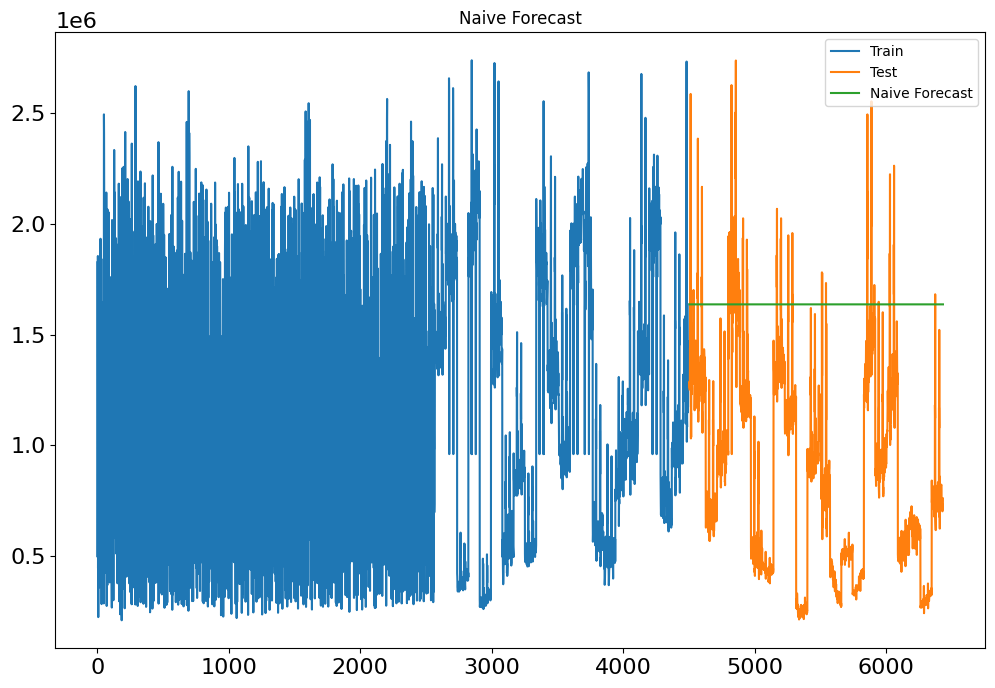

In [64]:
dd= np.asarray(train.Weekly_Sales)
y_hat = test.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(train.index, train['Weekly_Sales'], label='Train')
plt.plot(test.index,test['Weekly_Sales'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

In [65]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from math import sqrt
mae_i = sqrt(mean_absolute_error(test.Weekly_Sales, y_hat.naive))
print("MAE :",mae_i)
rmse_i = sqrt(mean_squared_error(test.Weekly_Sales, y_hat.naive))
print("RMSE :",rmse_i)

MAE : 891.1313684783016
RMSE : 888897.9975291895


# **ii) Moving Average Model**

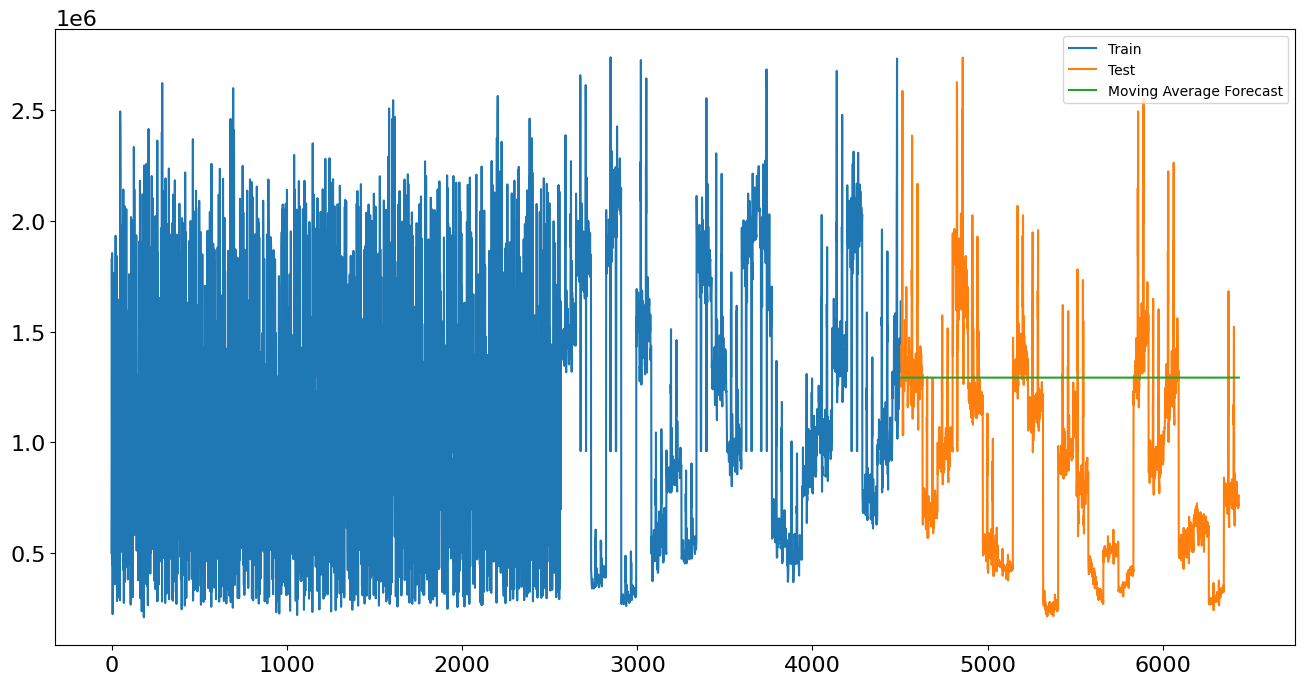

In [66]:
y_hat_avg = test.copy()
y_hat_avg['moving_avg_forecast'] = train['Weekly_Sales'].rolling(60).mean().iloc[-1]
plt.figure(figsize=(16,8))
plt.plot(train['Weekly_Sales'], label='Train')
plt.plot(test['Weekly_Sales'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()

In [67]:
mae_ii = sqrt(mean_absolute_error(test.Weekly_Sales, y_hat_avg.moving_avg_forecast))
print("MAE :",mae_ii)
rmse_ii = sqrt(mean_squared_error(test.Weekly_Sales, y_hat_avg.moving_avg_forecast))
print("RMSE is:",rmse_ii)

MAE : 720.2650352834111
RMSE is: 616017.8467997839


# **iii) ARIMA Model**

- We need to plot AF & PCAF first.

In [68]:
train_log = np.log(train['Weekly_Sales'])
test_log = np.log(test['Weekly_Sales'])
train_log_diff = train_log - train_log.shift(1)
train_log = train_log.dropna()
test_log = test_log.dropna()

In [69]:
from statsmodels.tsa.stattools import acf,pacf
lag_acf = acf(train_log_diff.dropna(), nlags=10)
lag_pacf = pacf(train_log_diff.dropna(), nlags=10, method='ols')

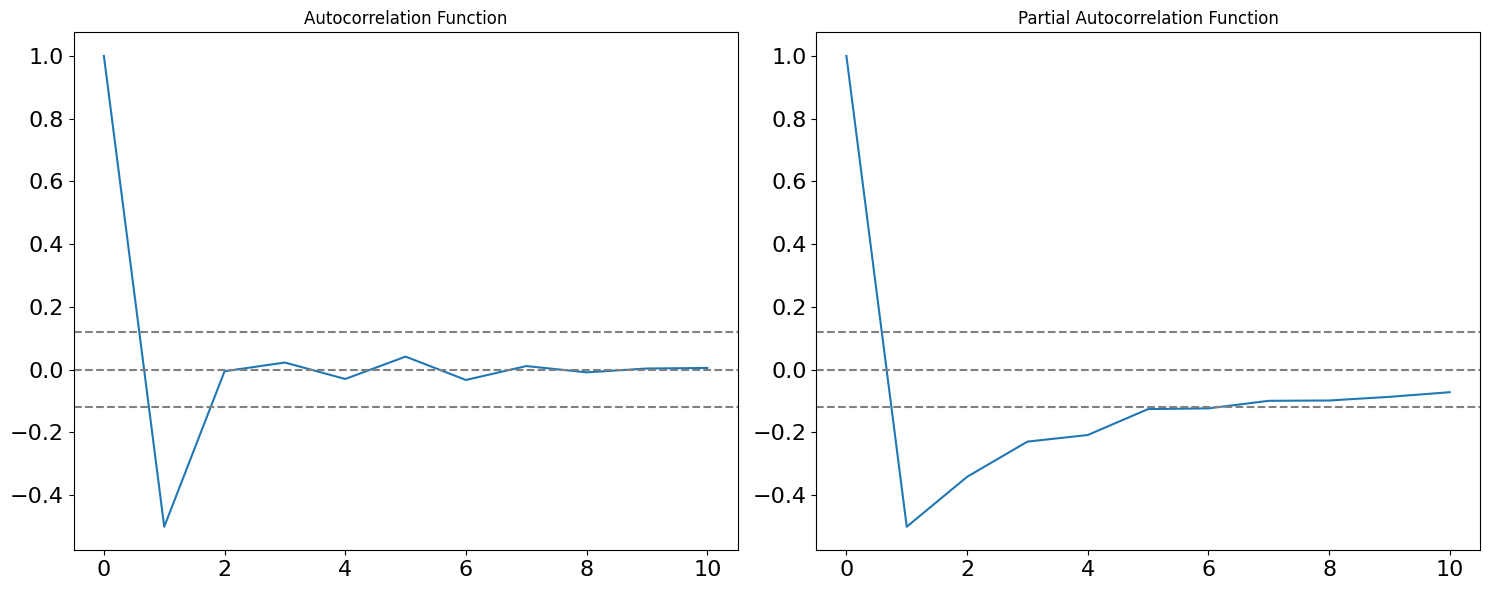

In [70]:
#Plot ACF & PACF :
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-7.96/np.sqrt(len(train_log_diff)),linestyle='--',color='gray')
plt.axhline(y=7.96/np.sqrt(len(train_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(1,2,2)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-7.96/np.sqrt(len(train_log_diff)),linestyle='--',color='gray')
plt.axhline(y=7.96/np.sqrt(len(train_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

- Using the plot we can determine the values for p and q respectively :

    - p: the lag value where the PACF cuts off (drop to 0) for the first time. So here p = 1.
    - q: the lag value where the ACF chart crosses the upper confidence interval for the first time.so, q=1.

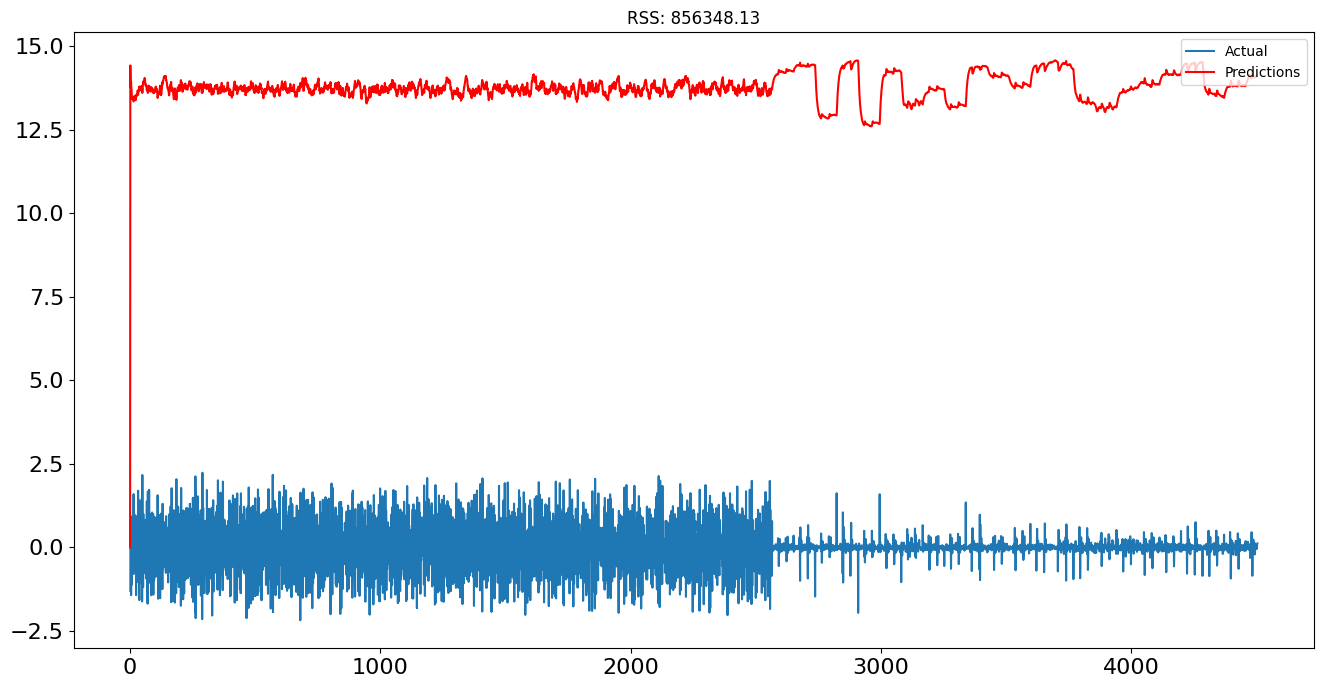

In [71]:
# Optimal values fot ARIMA(p,d,q) model are (1,1,1). Hence plot the ARIMA model using the value (1,1,1)
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train_log, order=(2, 1, 1))
results_ARIMA = model.fit()
plt.figure(figsize=(16,8))
plt.plot(train_log_diff.dropna(),label='Actual')
plt.plot(results_ARIMA.fittedvalues, color='red',label='Predictions')
plt.legend(loc='upper right')
sum = ((results_ARIMA.fittedvalues-train_log_diff)**2).sum()
plt.title('RSS: %.2f'% sum)
plt.show()

In [72]:
# Forecasting 300 steps ahead
fc = results_ARIMA.forecast(steps=300)

# Print the shape of forecasted values
print("Shape of forecasted values:", fc.shape)

Shape of forecasted values: (300,)


In [73]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Slice the true values to match the length of forecasted values
test_fc = test['Weekly_Sales'][:300]

# Report performance
mae_v = mean_absolute_error(test_fc, fc)
print('MAE: ', mae_v)

rmse_v = np.sqrt(mean_squared_error(test_fc, fc))
print('RMSE: ', rmse_v)

MAE:  1067810.6138403912
RMSE:  1118526.4621683066


# **7. Model Evaluation**

**Comparing all the models:**

- Here, we are choosing **Mean Absolute Error** as main for evaluation.

In [74]:
models = pd.DataFrame({
    'Model': [ 'Naive Approach', 'Moving Average',"ARIMA"],
    'MAE': [
        mae_i,
        mae_ii,
        mae_v]


       })
print("--------TIME FORECASTING MODELS---------")
models.sort_values(by='MAE', ascending=True)

--------TIME FORECASTING MODELS---------


,Model,MAE
1,Moving Average,7.202650e+02
0,Naive Approach,8.911314e+02
2,ARIMA,1.067811e+06


# **Conclusion:**
# For this dataset, Moving Average model is best suited for Forecasting.